### G.3
Here's a curve shown together with a perpendicular frame: Your job to use the matrix maker ingredients to come up with a matrix A that picks up the curve and flips it over the plotted line to get its mirror image with respect to the plotted line.
Plot to confirm


In [ ]:
ax = plt.gca()
#setup   

x = np.linspace(0, math.pi, 1000)

circle = []
for val in x:
    point = ShapeGenerator.generateCircle(val, xorigin = 2, yorigin = 2)
    circle.append(point)
line = np.array(circle).transpose()

Helper.drawVector(ax, 3 * perpframes.aligner[0,0], 3 * perpframes.aligner[0,1], 'blue')
Helper.drawVector(ax, - 3 * perpframes.aligner[0,0],-3* perpframes.aligner[0,1], 'blue')

Helper.drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
Helper.drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')

Helper.drawVector(ax, pa[0,0], pa[0,1], 'green')
Helper.drawVector(ax, pa[1,0], pa[1,1], 'green')

plt.plot(line[0,], line[1,],  color = 'pink')

hanger = perpframes.hanger
inverted_aligner = np.array([perpframes.aligner[0], -1 * perpframes.aligner[1]])
#inverted across hanger

hanger = inverted_aligner.transpose()
A = hanger.dot(stretchMat.dot(perpframes.aligner))

line = A.dot(line)
plt.plot(line[0,], line[1,],  color = 'red')
plt.draw()

ax.set_aspect('equal')
ax.grid(True, which='both')
#show the graph

plt.show()

The results of this cell show a reflection across the perpindecular frame in both the x and y direction. If we want to demonstrate no inversion in one particular axis, we will have to set a part of the perp frame = 0.

If we want to invert specifically over the first perpframe, we must first multiply perpframe[1] (which is 2) by -1. Then we do the same hanger.stretcher.aligner (in this case the stretcher is 1) to create the appropriate transform. 

The most important line is `inverted_aligner = np.array([perpframes.aligner[0], -1 * perpframes.aligner[1]])` which is the line to create the inverted aligner. This is what will eventually be the hung perp frame.

There is another way of creating this effect. If you use the ystretch factor and multiply it by -1, then you would be able to accomplish the same task. 

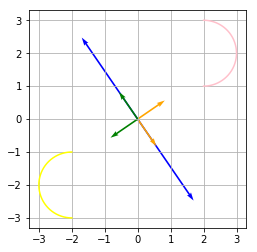

In [51]:
#Alternative solution 1: Rotate across multiple axis 

import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import math

from matrixoperations import *
ax = plt.gca()
#setup   
s = Helper.generateRandomBetween(-10,10)
perpframes = PerpFrames(s)
s = Helper.generateRandomBetween(-1.5,1.5)
perpframes2 = PerpFrames(s)

#get stretcher matrix
stretcher = Stretcher()
stretcher.setXYStretch(1, 1)
stretchMat = stretcher.getStretchMatrix()

lim = 0
if(max(plt.ylim() > max(plt.xlim()))):
	lim = max(plt.ylim())

x = np.linspace(0, math.pi, 1000)


circle = []
for val in x:
    point = ShapeGenerator.generateCircle(val, xorigin = 2, yorigin = 2)
    circle.append(point)
line = np.array(circle).transpose()


# drawVector(ax, 0, 1, 'orange')
Helper.drawVector(ax, 3 * perpframes.aligner[0,0], 3 * perpframes.aligner[0,1], 'blue')
Helper.drawVector(ax, - 3 * perpframes.aligner[0,0],-3* perpframes.aligner[0,1], 'blue')

Helper.drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
Helper.drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')

# create an inverted perp frame
pa = -1 * perpframes.aligner
Helper.drawVector(ax, pa[0,0], pa[0,1], 'green')
Helper.drawVector(ax, pa[1,0], pa[1,1], 'green')

plt.plot(line[0,], line[1,],  color = 'pink')

A = perpframes.aligner.dot(stretchMat.dot(pa.transpose())) 
line = A.dot(line)
plt.plot(line[0,], line[1,],  color = 'yellow')

plt.draw()

ax.set_aspect('equal')
ax.grid(True, which='both')
#show the graph

plt.show()

### G4

To get the point on the line closest to the given point, make a matrix 
A = hanger . stretcher . aligner 
that preserves lengths in the direction of perpframe[1] but zeroes out all lengths in the direction of perpframe[2]: 
This means you want

A.perpframe[1] = 1.0 perpframe[1]
A.perpframe[2] = 0.0 perpframe[2]

[ 1.49870258  1.08887116]


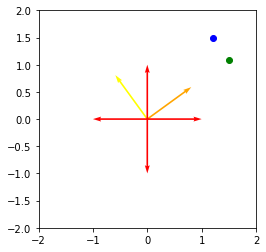

In [49]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import math
from matrixoperations import *

#get unit vector from line directionvector/Sqrt[directionvector . directionvector]
# ax = plt.gca()
perpframes = PerpFrames(.2 * math.pi)
pf = PerpFrames.createPerpFrame(perpframes.aligner[0])

fig = plt.figure()
subplt = fig.add_subplot(111,aspect='equal')

point = [1.2, 1.5]
#draw point and vector
subplt.plot(point[0],point[1],'ro', color = 'blue')
Helper.drawVector(subplt,pf[0][0], pf[0][1], 'orange')
Helper.drawVector(subplt,pf[1][0], pf[1][1], 'yellow')

#draw axis
Helper.drawVector(subplt,0, 1, 'red')
Helper.drawVector(subplt,1, 0, 'red')
Helper.drawVector(subplt,0, -1, 'red')
Helper.drawVector(subplt,-1, 0, 'red')

#Create stretcher direction 1 perp 0 perp2
stretcher = Stretcher()
stretcher.setXYStretch(1, 0)
stretchMat = stretcher.getStretchMatrix()


A = (pf.transpose()).dot(stretchMat.dot(pf))

closestpoint = A.dot(point)
print(closestpoint)
subplt.plot(closestpoint[0], closestpoint[1] ,'ro', color = 'green')

subplt.set_xlim([-2, 2])
subplt.set_ylim([-2, 2])
plt.show()



In this problem, we changed the line to a unit vector. We then "zero" out the y direction so the point will end up on the line. Then we hang, stretch, and align (HSA) to get the closest point. 

### G.3.e 

Make a matrix A whose action is described as follows:
The hit by A rotates everything Pi/4 counterclockwise radians, then stretches by a factor of 1.8 along the x-axis and a factor of 0.7 along the y-axis and then rotates the result by Pi/3 clockwise radians.